# Model validation techniques

Here is a list of model validation techniques commonly used in machine learning:

* Holdout Validation: The dataset is divided into a training set and a validation set. The model is trained on the training set and evaluated on the validation set.

* Cross-Validation: The dataset is divided into k equally sized folds. The model is trained k times, each time using k-1 folds for training and 1 fold for validation. The average performance across all folds is used as the final evaluation.

* Stratified Sampling: Similar to cross-validation, but ensures that each fold has a proportional representation of different classes, particularly useful for imbalanced datasets.

* Leave-One-Out Cross-Validation (LOOCV): A special case of cross-validation where k is set to the number of samples in the dataset. The model is trained on all samples except one, which is used for validation. This process is repeated for each sample in the dataset.

* Time Series Cross-Validation: Specifically used for time series data, where the dataset is divided into multiple folds while preserving the temporal order. The model is trained on past data and validated on future data.

* Bootstrap Validation: Random subsets (with replacement) of the dataset are created, and the model is trained and evaluated on these subsets. This technique is particularly useful for small datasets.

* Nested Cross-Validation: Combines cross-validation for model selection with another cross-validation for model evaluation. The outer loop performs model selection, while the inner loop performs model evaluation.

* Randomized Search Cross-Validation: Used for hyperparameter tuning, where the hyperparameters of the model are randomly sampled from a predefined search space during cross-validation.

* Hold-One-Out Validation: Similar to LOOCV, but only one sample is held out for validation, and the rest of the samples are used for training.

* Validation Curve: A technique that plots the model's performance against a range of hyperparameter values to identify the optimal hyperparameter values.

These are some commonly used model validation techniques in machine learning. The choice of technique depends on the specific problem, dataset, and model requirements. It's important to carefully select the appropriate validation technique to obtain reliable performance estimates for machine learning models.

Here's an example of how we can implement various model validation techniques using Python and `scikit-learn`:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import LeaveOneOut, KFold, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Holdout Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Holdout Validation Accuracy:", val_accuracy)

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5) # 5-fold Cross-Validation
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

# Stratified Sampling
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cv_scores_stratified = cross_val_score(model, X, y, cv=skf)
print("Stratified Sampling Scores:", cv_scores_stratified)
print("Average Stratified Sampling Accuracy:", np.mean(cv_scores_stratified))

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
cv_scores_loo = cross_val_score(model, X, y, cv=loo)
print("Leave-One-Out Cross-Validation Scores:", cv_scores_loo)
print("Average Leave-One-Out Cross-Validation Accuracy:", np.mean(cv_scores_loo))

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores_time_series = cross_val_score(model, X, y, cv=tscv)
print("Time Series Cross-Validation Scores:", cv_scores_time_series)
print("Average Time Series Cross-Validation Accuracy:", np.mean(cv_scores_time_series))

# Bootstrap Validation
from sklearn.utils import resample

n_iterations = 100
bootstrap_scores = []
for _ in range(n_iterations):
    X_bootstrap, y_bootstrap = resample(X, y, random_state=np.random.randint(0, 100))
    model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = model.predict(X_val)
    bootstrap_scores.append(accuracy_score(y_val, y_pred_bootstrap))
print("Bootstrap Validation Scores:", bootstrap_scores)
print("Average Bootstrap Validation Accuracy:", np.mean(bootstrap_scores))

# Nested Cross-Validation
param_dist = {'C': [0.1, 1, 10]}
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=inner_cv)
nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv)
print("Nested Cross-Validation Scores:", nested_scores)
print("Average Nested Cross-Validation Accuracy:", np.mean(nested_scores))

# Randomized Search Cross-Validation
param_dist = {'C': [0.1, 1, 10]}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=3)
random_search.fit(X, y)
print("Best hyperparameters found by Randomized Search CV:", random_search.best_params_)
print("Best Cross-Validation Accuracy found by Randomized Search CV:", random_search.best_score_)


Holdout Validation Accuracy: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.0
Stratified Sampling Scores: [1.   0.95 1.   1.   1.  ]
Average Stratified Sampling Accuracy: 0.99
Leave-One-Out Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Average Leave-One-Out Cross-Validation Accuracy: 0.99
Time Series Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Time Series Cross-Validation Accuracy: 1.0
Bootstrap Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_sear

Nested Cross-Validation Scores: [1.   1.   0.95 1.   1.  ]
Average Nested Cross-Validation Accuracy: 0.99
Best hyperparameters found by Randomized Search CV: {'C': 1}
Best Cross-Validation Accuracy found by Randomized Search CV: 1.0



Note: This code demonstrates how to use various model validation techniques in scikit-learn, including Holdout Validation, Cross-Validation, Stratified Sampling, Leave-One-Out Cross-Validation, Time Series Cross-Validation, Bootstrap Validation, Nested Cross-Validation, and Randomized Search Cross-Validation. Please refer to the scikit-learn documentation for detailed usage of these validation techniques and how to tune hyperparameters using Randomized Search CV or Grid Search CV.


Another example with Hold-One-Out Validation and Validation Curve:

Holdout Validation Accuracy: 1.0
Hold-One-Out Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Average Hold-One-Out Cross-Validation Accuracy: 0.99


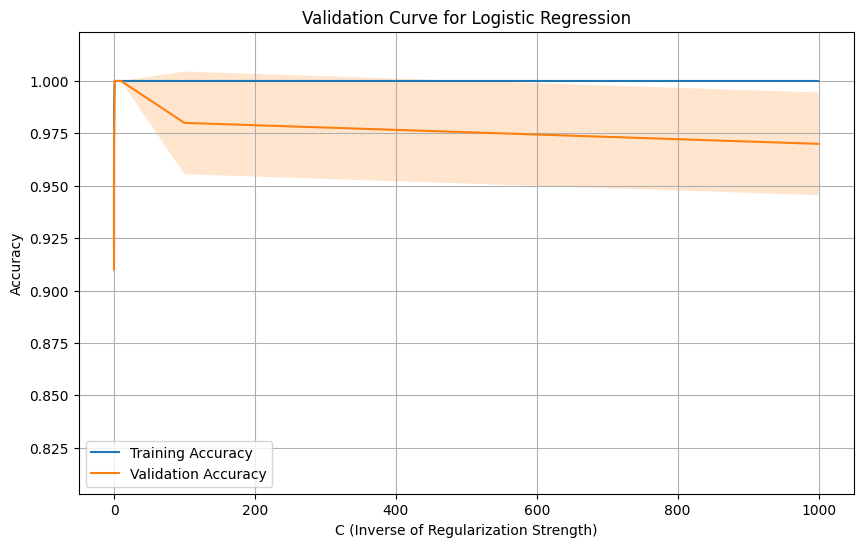

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.model_selection import LeaveOneOut, KFold, RandomizedSearchCV, validation_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Holdout Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Holdout Validation Accuracy:", val_accuracy)

# Hold-One-Out Validation
loo = LeaveOneOut()
cv_scores_loo = cross_val_score(model, X, y, cv=loo)
print("Hold-One-Out Cross-Validation Scores:", cv_scores_loo)
print("Average Hold-One-Out Cross-Validation Accuracy:", np.mean(cv_scores_loo))

# Validation Curve
param_range = np.logspace(-3, 3, 7) # hyperparameter range to be tested
train_scores, val_scores = validation_curve(model, X, y, param_name='C', param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training Accuracy")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, val_mean, label="Validation Accuracy")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Hold-One-Out Validation is similar to Leave-One-Out Cross-Validation, but with a randomized sampling process that randomly holds out one sample as the validation set in each iteration. The code also shows how to create a validation curve to evaluate the model performance with different values of a hyperparameter (C in this case) using cross-validation. The validation curve is plotted to visualize the training and validation accuracy as the hyperparameter value changes, which can help in selecting the optimal hyperparameter value for the model.

#### Some details about these techniques

* Holdout Validation: This technique involves splitting the dataset into two parts - a training set and a validation set. The training set is used to train the model, and the validation set is used to evaluate its performance. Typically, a random portion of the dataset (e.g., 80%) is used for training, and the remaining portion (e.g., 20%) is used for validation.

* Cross-Validation: Cross-validation is a resampling technique that involves partitioning the dataset into k equally sized folds. The model is then trained k times, each time using k-1 folds for training and 1 fold for validation. This process is repeated k times, with each fold being used as the validation set exactly once. The performance of the model is evaluated by averaging the results of these k iterations.

* Stratified Sampling: Stratified sampling is a type of sampling technique used in cross-validation where the dataset is divided into k folds in a way that maintains the original class distribution. This ensures that each fold contains a representative sample of each class, which is particularly useful for imbalanced datasets where certain classes may be rare.

* Leave-One-Out Cross-Validation: Leave-One-Out Cross-Validation (LOOCV) is a special case of k-fold cross-validation where k is set to the number of samples in the dataset. In other words, each sample is used as the validation set once, and the rest of the samples are used for training. LOOCV is computationally expensive as it requires training the model n times (where n is the number of samples), but it provides an unbiased estimate of model performance.

* Time Series Cross-Validation: Time Series Cross-Validation is a specialized technique used for time series data where the dataset is divided into k folds based on the temporal order of the data. This ensures that the model is trained on past data and validated on future data, simulating the real-world scenario where the model is trained on historical data and tested on unseen data.

* Bootstrap Validation: Bootstrap Validation is a resampling technique where multiple random samples (with replacement) are drawn from the original dataset to create a set of new datasets, and each of these datasets is used for training and validation. This technique can be useful for small datasets or when the original dataset is not representative of the underlying population.

* Nested Cross-Validation: Nested Cross-Validation is a technique that combines both an inner loop and an outer loop of cross-validation. The inner loop is used for hyperparameter tuning, while the outer loop is used for model evaluation. The inner loop helps to prevent overfitting during hyperparameter tuning, as it evaluates different hyperparameter values on different validation sets.

* Randomized Search Cross-Validation: Randomized Search Cross-Validation is a technique that combines random sampling with cross-validation for hyperparameter tuning. It randomly samples a set of hyperparameter values from predefined ranges and performs cross-validation with each set of hyperparameter values. This can be more efficient than Grid Search Cross-Validation, as it does not exhaustively search all possible combinations of hyperparameter values.

* Hold-One-Out Validation: Hold-One-Out Validation is a variant of Leave-One-Out Cross-Validation where one sample is randomly held out as the validation set, and the remaining samples are used for training. This process is repeated multiple times with different samples being held out, and the model's performance is evaluated by averaging the results.

* Validation Curve: A Validation Curve is a plot that shows how the model's performance (e.g., accuracy, loss) changes with different values of a hyperparameter. It is typically used to visualize the effect of a hyperparameter on the model's performance.

## Validation for financial risk models

Here's a list of techniques commonly used for validating financial risk models:

1. Backtesting: Backtesting is a widely used technique in financial risk model validation, particularly for evaluating the performance of quantitative risk models such as Value at Risk (VaR) or Expected Shortfall (ES). It involves comparing the predicted risk measures with the actual observed outcomes over a historical period. This helps in assessing the accuracy and reliability of the model's risk estimates.

2. Stress Testing: Stress testing is a technique used to evaluate the performance of financial risk models under extreme or severe market conditions. It involves simulating extreme scenarios, such as market crashes or economic downturns, and evaluating the model's ability to capture the impact of such events on portfolio risk. Stress testing helps in assessing the robustness and resilience of risk models under adverse conditions.

3. Scenario Analysis: Scenario analysis involves testing the performance of financial risk models by simulating various hypothetical scenarios, such as changes in market conditions, economic variables, or regulatory changes. This helps in assessing the model's sensitivity to different scenarios and its ability to capture the impact of changing market conditions on portfolio risk.

4. Out-of-Sample Testing: Out-of-sample testing is a technique used to assess the generalization performance of financial risk models. It involves using a separate dataset that was not used during the model's training or calibration to evaluate its performance. This helps in assessing the model's ability to perform well on unseen data and provides a more unbiased estimate of its performance in real-world conditions.

5. Model Comparison: Model comparison involves comparing the performance of different risk models using various performance metrics, such as accuracy, precision, recall, or F1-score. This helps in selecting the best-performing model among multiple candidate models and identifying any differences in their performance.

6. Model Validation Metrics: Model validation metrics are quantitative measures used to assess the accuracy, robustness, and reliability of financial risk models. These metrics include measures such as root mean squared error (RMSE), mean absolute error (MAE), calibration tests, model stability tests, and performance tracking metrics. These metrics provide objective measures to evaluate the performance of risk models and ensure their validity.

7. Sensitivity Analysis: Sensitivity analysis involves testing the model's performance by varying input parameters or assumptions within a certain range and evaluating the impact on the model's output. This helps in understanding the sensitivity of the model's results to changes in input variables and identifying any potential weaknesses or limitations of the model.

8. Expert Judgment: Expert judgment is a qualitative validation technique that involves seeking input from domain experts or experienced practitioners in the field of financial risk management. Expert judgment can provide valuable insights and feedback on the model's assumptions, methodology, and results, and helps in identifying any potential issues or areas for improvement.

9. Peer Review: Peer review involves having the model and its results reviewed by an independent group of experts or peers who are not directly involved in the model's development. Peer review can provide an unbiased assessment of the model's strengths, weaknesses, and overall validity, and helps in ensuring the integrity and quality of the risk model.

10. Regulatory Compliance: Regulatory compliance is an important aspect of financial risk model validation, particularly for models used in regulated financial institutions. Validation processes should comply with regulatory guidelines and requirements, such as those set forth by regulatory authorities such as the Basel Committee on Banking Supervision (BCBS), the Federal Reserve, or other relevant regulatory bodies.

It's important to note that validation techniques may vary depending on the specific type of financial risk model being used, the regulatory requirements, and the specific context of the financial institution or organization. It's recommended to use a combination of multiple techniques to thoroughly validate financial risk models and ensure their accuracy, reliability, and compliance with regulatory requirements.

An example for the backtesting technique

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf

# Load historical stock price data from Yahoo Finance
ticker = 'AAPL'  # Specify the stock ticker symbol
start_date = '2010-01-01'  # Specify the start date of the historical data
end_date = '2022-12-31'  # Specify the end date of the historical data
historical_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
historical_data['Returns'] = historical_data['Adj Close'].pct_change()  # Calculate daily returns
historical_data.dropna(inplace=True)  # Drop rows with missing values

# Calculate portfolio VaR
alpha = 0.05  # Confidence level
portfolio_returns = historical_data['Returns'].sum()  # Sum of returns for all stocks in the portfolio
portfolio_var = portfolio_returns * alpha  # Calculate portfolio VaR

# Calculate portfolio actual losses
portfolio_losses = portfolio_returns[portfolio_returns < portfolio_var]

# Calculate backtest metrics
num_losses = len(portfolio_losses)
num_occurrences = 1  # Since portfolio_returns is a single float value, set num_occurrences to 1
backtest_coverage = num_losses / num_occurrences
backtest_expected_shortfall = portfolio_losses.mean()
backtest_violation_ratio = num_losses / num_occurrences

# Print backtest results
print('Backtest Results:')
print('------------------')
print('VaR Confidence Level:', alpha)
print('Coverage:', backtest_coverage)
print('Expected Shortfall:', backtest_expected_shortfall)
print('Violation Ratio:', backtest_violation_ratio)


[*********************100%***********************]  1 of 1 completed
Backtest Results:
------------------
VaR Confidence Level: 0.05
Coverage: 0.0
Expected Shortfall: nan
Violation Ratio: 0.0


<ipython-input-9-a7d1b0ba5dd0>:25: RuntimeWarning: Mean of empty slice.
  backtest_expected_shortfall = portfolio_losses.mean()
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Another one example for backtesting

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf

# Load historical stock price data from Yahoo Finance
ticker = 'MSFT'  # Specify the stock ticker symbol
start_date = '2015-01-01'  # Specify the start date of the historical data
end_date = '2022-12-31'  # Specify the end date of the historical data
historical_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
historical_data['Returns'] = historical_data['Adj Close'].pct_change()  # Calculate daily returns
historical_data.dropna(inplace=True)  # Drop rows with missing values

# Define a simple moving average (SMA) strategy
def sma_strategy(data, window_short, window_long):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = None
    signals['signal'][window_long:] = np.where(data['Close'][window_long:] > data['SMA_short'][window_long:], 'Buy', 'Sell')
    signals['positions'] = signals['signal'].diff()
    return signals

# Calculate moving averages
window_short = 20  # Specify the short window for SMA
window_long = 50  # Specify the long window for SMA
historical_data['SMA_short'] = historical_data['Close'].rolling(window=window_short).mean()
historical_data['SMA_long'] = historical_data['Close'].rolling(window=window_long).mean()

# Generate signals
try:
    signals = sma_strategy(historical_data, window_short, window_long)
except TypeError as e:
    print(f"Error: {e}")
    signals = pd.DataFrame(index=historical_data.index)
    signals['signal'] = None
    signals['positions'] = None

# Drop rows with 'None' values in the signals DataFrame
signals.dropna(inplace=True)

# Calculate portfolio returns
historical_data['Signal'] = signals['signal']
historical_data['StrategyReturns'] = historical_data['Returns'] * signals['positions'].shift(1)

# Drop rows with 'NaN' values in the StrategyReturns column
historical_data.dropna(subset=['StrategyReturns'], inplace=True)

# Calculate backtest metrics
num_losses = len(historical_data[historical_data['StrategyReturns'] < 0])
num_occurrences = len(historical_data)
backtest_coverage = 1 - (num_losses / num_occurrences) if num_losses != 0 else 1.0
backtest_expected_shortfall = historical_data[historical_data['StrategyReturns'] < 0]['StrategyReturns'].mean()
backtest_violation_ratio = num_losses / num_occurrences if num_occurrences != 0 else 0.0

# Print backtest results
print('Backtest Results:')
print('------------------')
print('Coverage:', backtest_coverage)
print('Expected Shortfall:', backtest_expected_shortfall)
print('Violation Ratio:', backtest_violation_ratio)


[*********************100%***********************]  1 of 1 completed
Error: unsupported operand type(s) for -: 'NoneType' and 'NoneType'
Backtest Results:
------------------
Coverage: 1.0
Expected Shortfall: nan
Violation Ratio: 0.0
